# Используем библиотеку Gensim

In [1]:
import os
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
import pandas as pd
from collections import Counter
import re
import gensim
from gensim import corpora

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
os.chdir('D:\МОЯ ПАПКА\УЧЕБА\ВКР\corpus_ver2')

# Тренеруем Word2Vec - вполне получается

In [3]:
from gensim.models.word2vec import Word2Vec
from gensim.models.word2vec import LineSentence
from multiprocessing import cpu_count
import gensim.downloader as api

In [4]:
#для чтения текста прямо из памяти компа, из xml файлов

class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        for fname in os.listdir(self.dirname):
            with open(fname, 'rb') as f:
                xml = f.read()
                root = objectify.fromstring(xml)
                for cld in root.getchildren():
                    for elem in cld.getchildren():
                        for i in elem.getchildren():
                            line = str(i.text)
                            yield line.split()

In [38]:
with open ('D:\МОЯ ПАПКА\УЧЕБА\ВКР\corpus_ver2\lemm_texts.txt', 'r') as f:
    text = f.readlines()
    for i in text:
        i = re.sub(r'ё', r'е', i)

In [31]:
class MySentences2(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        for i in open(os.path.join(self.dirname), encoding = 'utf-8'):
            i = re.sub(r'ё', r'е', i)
            yield i.split()

In [32]:
sentences = MySentences2('D:\МОЯ ПАПКА\УЧЕБА\ВКР\corpus_ver2\lemm_texts.txt') # a memory-friendly iterator

In [33]:
model = Word2Vec(sentences, size=1000, window=3, min_count=10)
print(model)
model.save('newmodel.model')

Word2Vec(vocab=4723, size=1000, alpha=0.025)


In [91]:
words = model.wv.vocab

In [93]:
word_vectors = model.wv

In [97]:
vector = word_vectors.wv.word_vec('война', use_norm=True)
vector

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


array([-9.14653670e-03, -2.81240065e-02,  2.80598346e-02, -2.32881233e-02,
       -2.18170900e-02, -3.68050784e-02, -2.62653790e-02, -3.41191120e-03,
       -1.42717995e-02, -6.04408383e-02, -6.57394752e-02,  5.45074604e-02,
       -2.85539888e-02,  7.33967312e-03, -2.52080653e-02,  2.53107827e-02,
        1.51695767e-02, -1.86045822e-02,  3.30631398e-02, -2.49443240e-02,
        1.60801206e-02, -1.05355261e-02, -5.92683721e-03,  3.03944349e-02,
       -1.26847867e-02,  6.19616453e-03, -1.54546387e-02,  2.50188354e-02,
       -1.87074598e-02,  2.05413625e-02,  9.45402309e-03, -6.97658118e-03,
        6.32628798e-02, -1.20673241e-04, -1.31006306e-02,  2.16413196e-03,
        1.04990508e-02, -1.26246428e-02, -2.31974409e-03,  2.05134433e-02,
        1.92618128e-02, -4.16619778e-02,  5.09133860e-02, -2.72087920e-02,
       -1.79687440e-02, -3.08531914e-02,  2.71096211e-02, -1.63627248e-02,
        1.80031005e-02,  1.54979536e-02, -5.17677888e-02,  2.57451385e-02,
       -6.88424893e-03, -

In [73]:
type(words)

dict

In [86]:
model.most_similar('война')[:20]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('конец', 0.833092451095581),
 ('кончиться', 0.8310996294021606),
 ('закончиться', 0.7764869332313538),
 ('настать', 0.7517692446708679),
 ('закончить', 0.7363989949226379),
 ('спать', 0.7276973128318787),
 ('весна', 0.7271578311920166),
 ('вперд', 0.7207109928131104),
 ('обед', 0.7181551456451416),
 ('наступить', 0.714058518409729)]

In [39]:
#model.most_similar(positive=['немец', 'война'], negative=['советский'], topn=1)

#model.doesnt_match("фашист немец враг".split())

model.similarity('мама', 'папа')

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """


0.64774823

In [40]:
X = model[model.wv.vocab]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [59]:
print(x)

[-1.3671621  -0.0265057  -0.0767188  ...  0.03424006  0.18107648
 -0.22715391]


In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


4723
[-3.88341807e-02  1.02867559e-01  1.01622574e-01  1.22132115e-01
 -1.86270565e-01 -3.88586283e-01  5.19702256e-01  1.07686505e-01
 -1.91062782e-02 -2.80217230e-01  1.66288868e-01  7.47369081e-02
 -1.75133385e-02  2.49494925e-01  1.64423361e-01  1.20921537e-01
  1.12807050e-01  1.57382980e-01  1.53261378e-01 -1.61156237e-01
  1.14049122e-01  1.84426114e-01  5.41324951e-02  4.14064117e-02
 -4.02009934e-02  2.39981994e-01  1.75664634e-01 -2.27596894e-01
  3.93340811e-02 -1.38125509e-01 -1.03302307e-01  2.33002976e-01
  1.79754898e-01 -3.66000533e-01 -1.57907262e-01 -8.26576650e-02
  3.75556499e-01  4.81818736e-01 -1.51808009e-01 -7.67153427e-02
 -1.34402692e-01  2.56147146e-01  1.39120013e-01 -1.60566494e-01
 -1.11105398e-03 -5.19761406e-02  1.74270019e-01  1.40932336e-01
 -3.73864062e-02  2.49512166e-01 -5.02210617e-01 -2.88286179e-01
  1.07503206e-01 -5.41389100e-02 -4.98222783e-02  2.76804771e-02
 -3.57300378e-02 -1.27749264e-01  2.87199974e-01 -8.88714269e-02
 -1.69601515e-01  6.

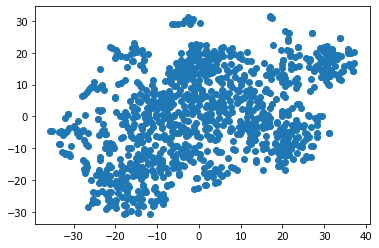

In [66]:
from sklearn.manifold import TSNE
import re
import matplotlib.pyplot as plt


X = model[model.wv.vocab]
print (len(X))
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X[:1000,:])

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

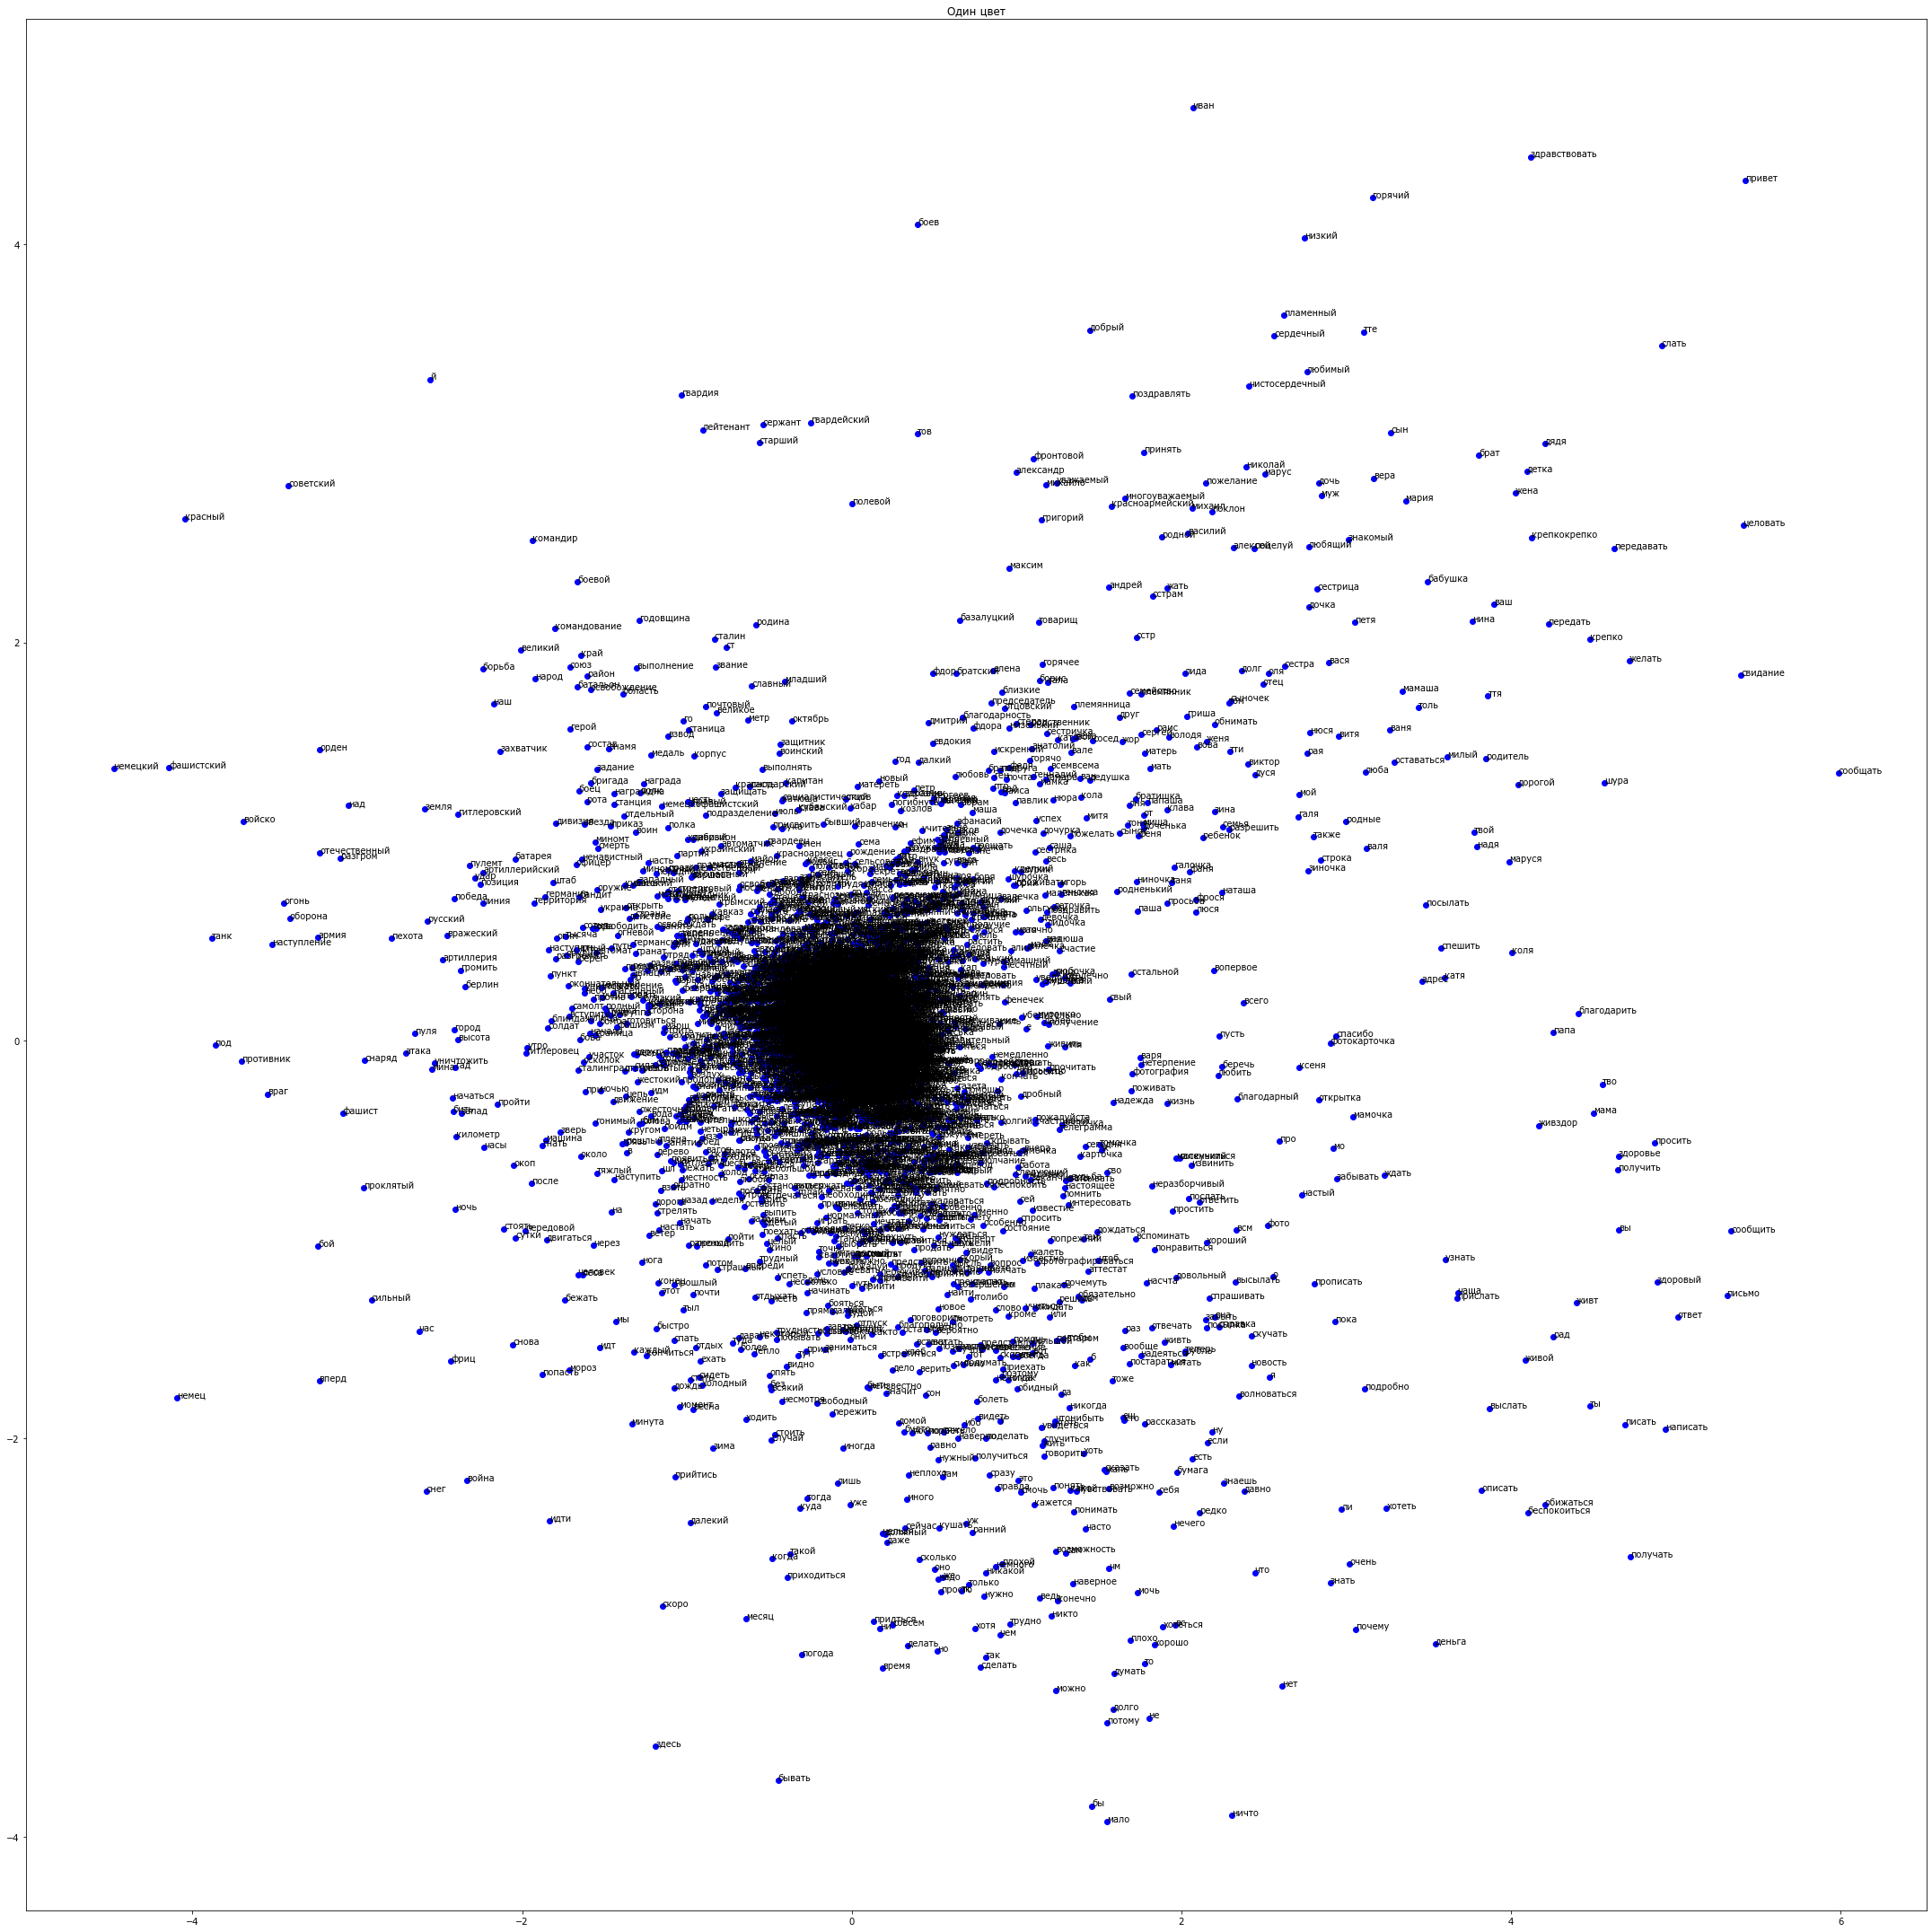

In [92]:
import matplotlib.pyplot as plt
#plt.scatter(result[:, 0], result[:, 1])

x = result[:, 0]

y = result[:, 1]

fig, ax = plt.subplots()

ax.scatter(x, y,
           c = 'blue')    #  цвет точек

ax.set_facecolor('white')     #  цвет области Axes
ax.set_title('Один цвет')     #  заголовок для Axes

fig.set_figwidth(30)     #  ширина и
fig.set_figheight(30)    #  высота "Figure"

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.tight_layout() 
plt.savefig('letters_W2V.png', dpi = 400)
plt.show()

In [44]:
plt.savefig('D:\МОЯ ПАПКА\УЧЕБА\ВКР\word_embbeds.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>